In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn.preprocessing
from sklearn import metrics
from math import sqrt
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import viz
np.random.seed(4)

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = acquire.acquire_military()

In [3]:
df = prepare.prep_military(df)

In [4]:
df

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,coastal_coverage,corvettes,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,waterways,total_air_strength,total_sea_strength,total_land_strength
132,United States,USA,1390000,20,45193,2837,1693,147399295,19924,22,...,68,627,6612,334998398,2661,982,41009,25447,220,56008
26,China,CHN,2000000,3,35000,5854,652,754864769,14500,70,...,79,3,5250,1397897720,399,286,110000,5651,430,49264
103,Russia,RUS,850000,1,30122,14145,1283,69737187,37653,86,...,70,20,12420,142320790,522,445,102000,8118,291,60078
131,United Kingdom,UKD,194000,2,5015,215,47,30857260,12429,0,...,10,9,227,67081000,247,40,3200,1291,67,5501
44,Germany,GER,184000,0,9217,121,130,36755601,2389,5,...,6,0,266,79903481,37,43,7467,1155,35,9642
50,India,IND,1450000,1,12000,3411,167,629485342,7000,22,...,17,6,4614,1339330514,353,253,14500,3837,191,21363
58,Japan,JPN,240000,4,5500,694,142,53615536,29751,6,...,21,7,1004,124687293,425,59,1770,2800,99,7297
112,South Korea,SKO,555000,2,13990,6894,202,25857581,2413,11,...,22,4,2624,51715162,289,41,1600,2900,189,24082
104,Saudi Arabia,SAR,225000,0,6202,2523,115,18087554,2640,4,...,0,22,1062,34783757,190,49,0,1545,53,10062
6,Australia,AUS,59000,2,1765,54,59,10840189,25760,0,...,6,6,59,25809973,113,38,2000,810,35,1878


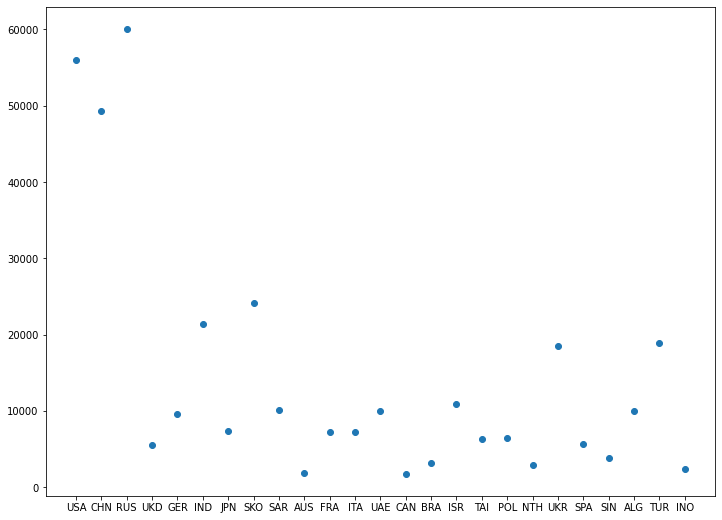

In [5]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:,1], df.iloc[:,46])

In [6]:
df = prepare.split_military(df)

Train: 14 rows, 47 cols
Validate: 6 rows, 47 cols
Test: 5 rows, 47 cols


In [7]:
train, validate, test = df

In [8]:
train.shape

(14, 47)

In [9]:
train.head().T

,22,26,104,98,58
country,Canada,China,Saudi Arabia,Poland,Japan
country_code,CAN,CHN,SAR,POL,JPN
active_personnel,70000,2000000,225000,120000,240000
air_carriers,0,3,0,0,4
armored_vehicles,1534,35000,6202,4786,5500
arty,163,5854,2523,609,694
attack_aircraft,0,652,115,30,142
avail_manpower,16315589,754864769,18087554,18711097,53615536
coastal_coverage,202080,14500,2640,440,29751
corvettes,0,70,4,2,6


In [10]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['active_personnel',
 'air_carriers',
 'armored_vehicles',
 'arty',
 'attack_aircraft',
 'avail_manpower',
 'coastal_coverage',
 'corvettes',
 'defense_budget',
 'destroyers',
 'external_debt',
 'fighters_interceptors',
 'fit_for_service',
 'gold_foreign_ex',
 'frigates',
 'helos',
 'labor_force',
 'merch_marine_fleet',
 'mine_warfare',
 'navy_ships',
 'oil_consumption',
 'oil_production',
 'oil_reser',
 'paramilitary',
 'patrol_vess',
 'ports',
 'purchasing_power',
 'railway_coverage',
 'mil_age',
 'res_personnel',
 'road_cov',
 'rocket_proj',
 'shared_borders',
 'special_mission',
 'square_land_area',
 'subs',
 'tanker_fleet',
 'tanks',
 'total_pop',
 'trainers',
 'transports',
 'waterways',
 'total_air_strength',
 'total_sea_strength',
 'total_land_strength']

<AxesSubplot:xlabel='total_air_strength', ylabel='Density'>

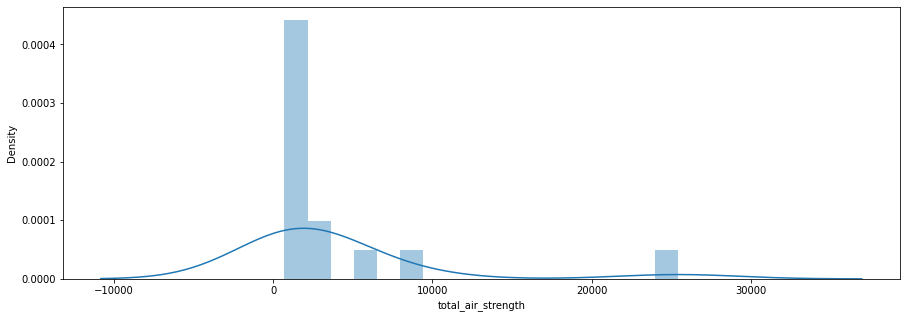

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_air_strength)

<AxesSubplot:xlabel='total_sea_strength', ylabel='Density'>

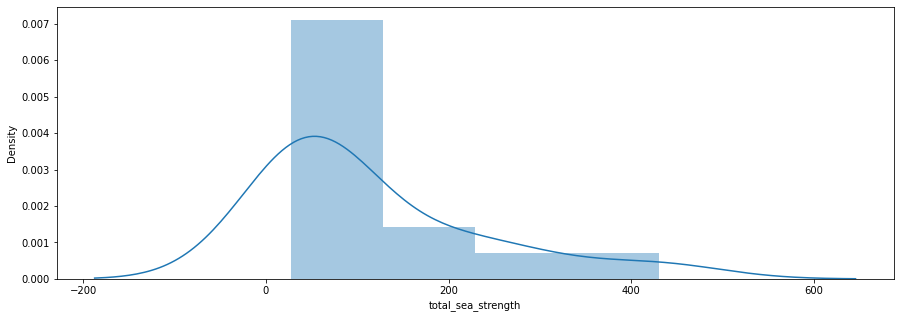

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_sea_strength)

<AxesSubplot:xlabel='total_land_strength', ylabel='Density'>

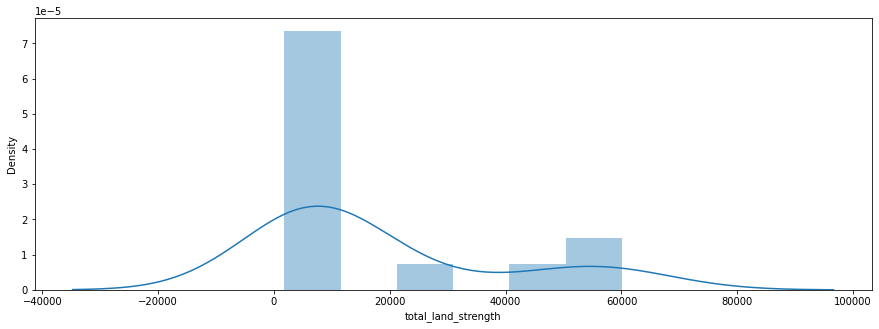

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_land_strength)

active_personnel


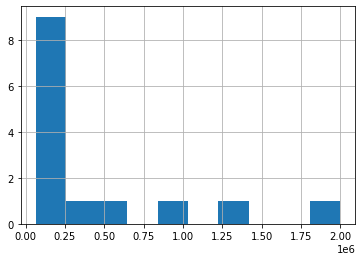

air_carriers


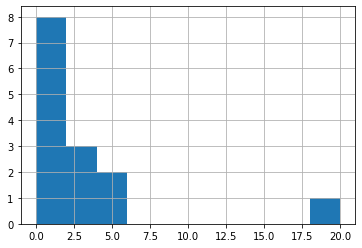

armored_vehicles


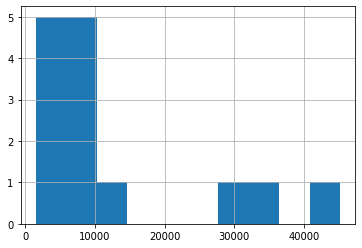

arty


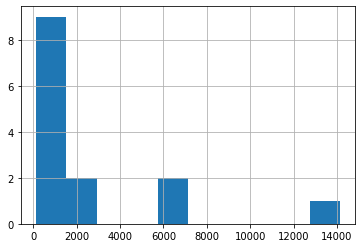

attack_aircraft


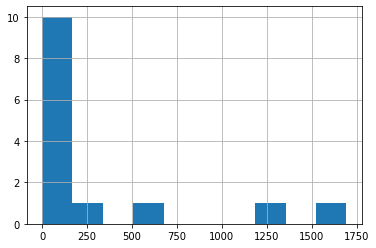

avail_manpower


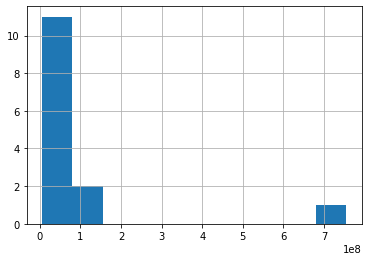

coastal_coverage


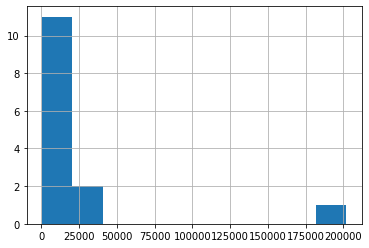

corvettes


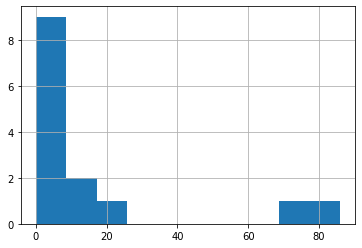

defense_budget


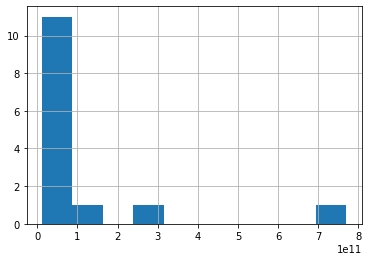

destroyers


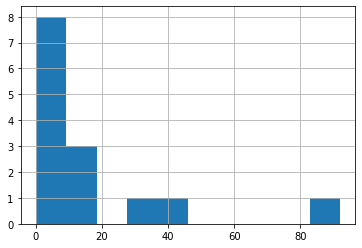

external_debt


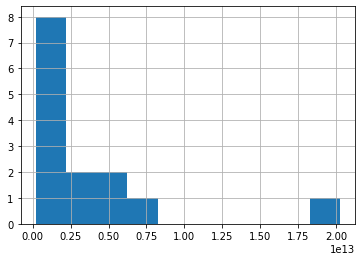

fighters_interceptors


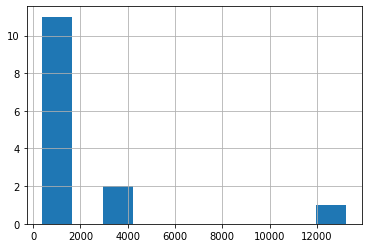

fit_for_service


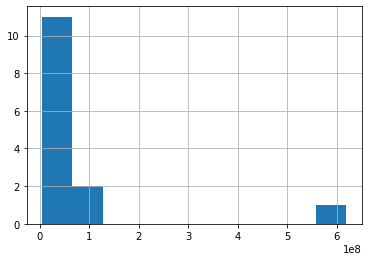

gold_foreign_ex


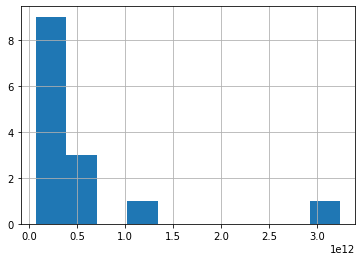

frigates


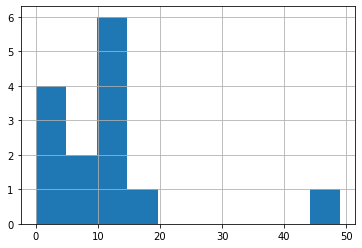

helos


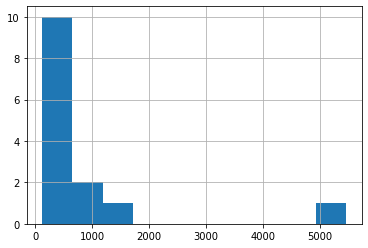

labor_force


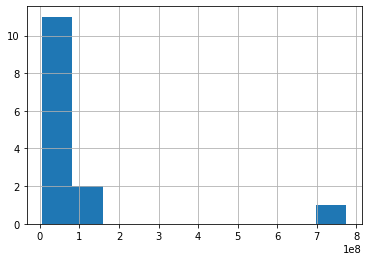

merch_marine_fleet


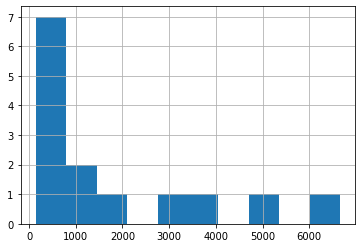

mine_warfare


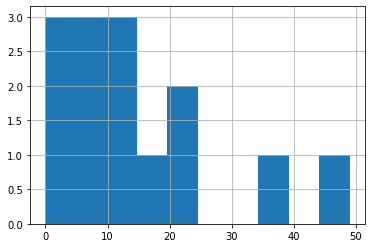

navy_ships


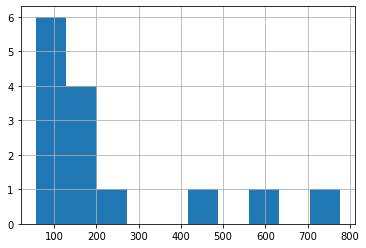

oil_consumption


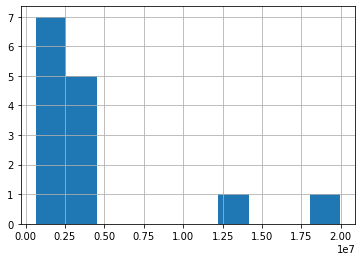

oil_production


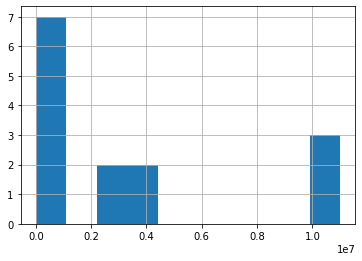

oil_reser


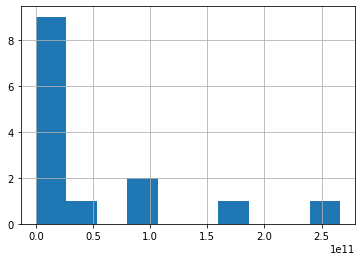

paramilitary


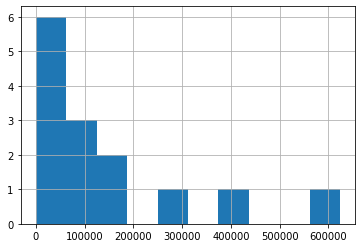

patrol_vess


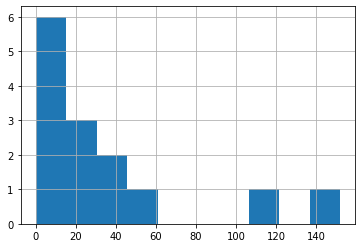

ports


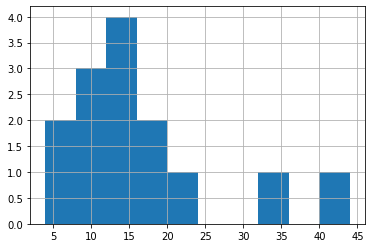

purchasing_power


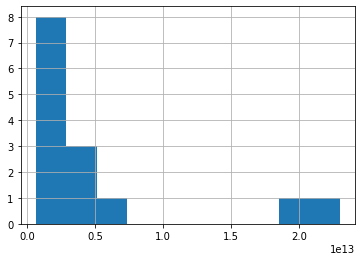

railway_coverage


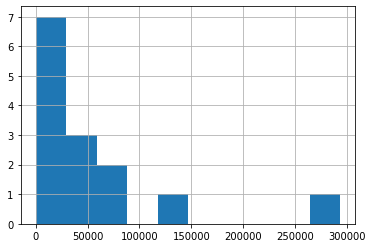

mil_age


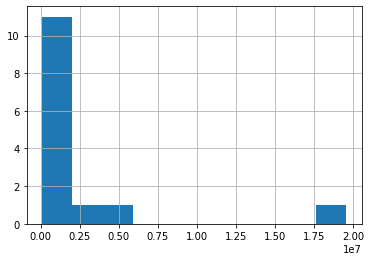

res_personnel


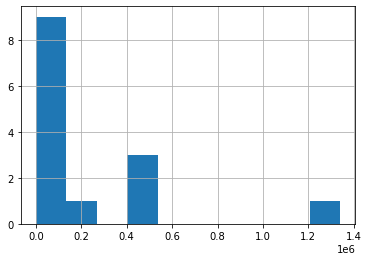

road_cov


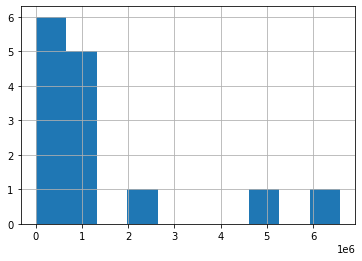

rocket_proj


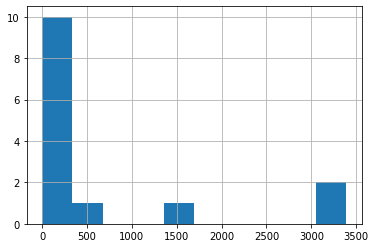

shared_borders


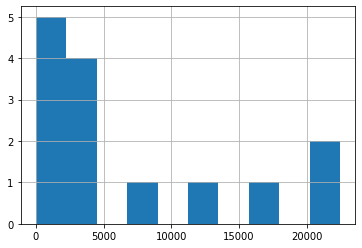

special_mission


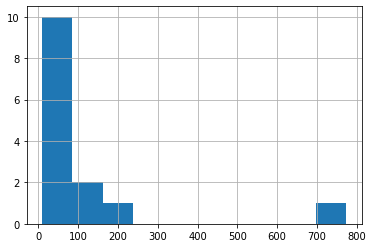

square_land_area


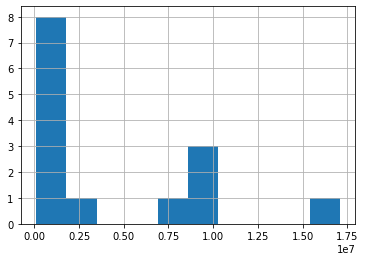

subs


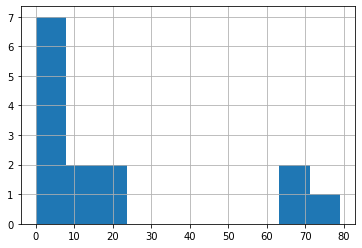

tanker_fleet


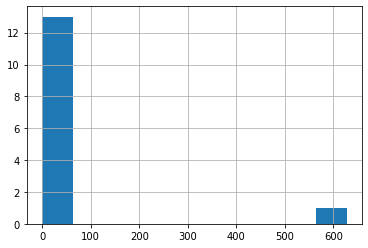

tanks


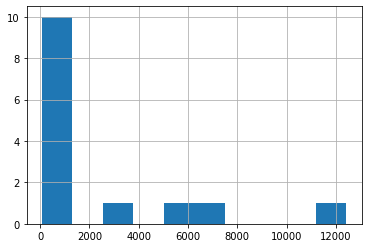

total_pop


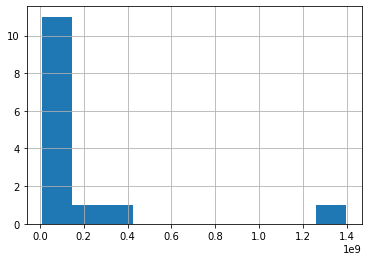

trainers


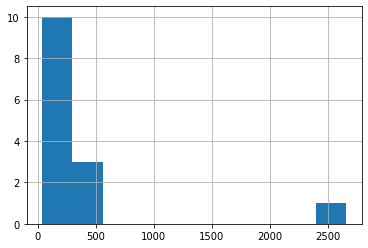

transports


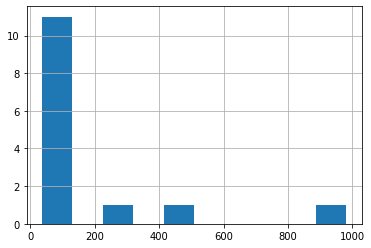

waterways


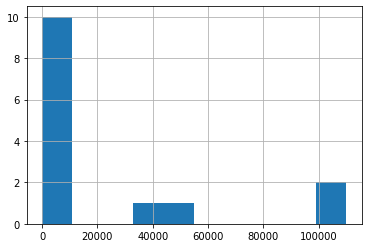

total_air_strength


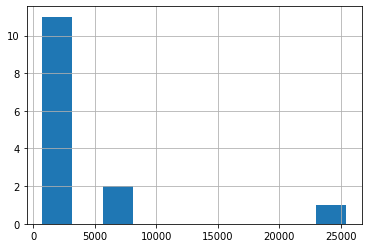

total_sea_strength


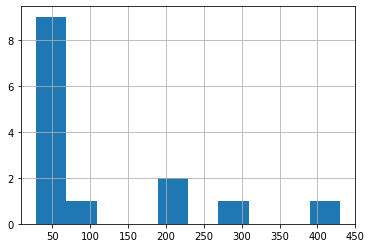

total_land_strength


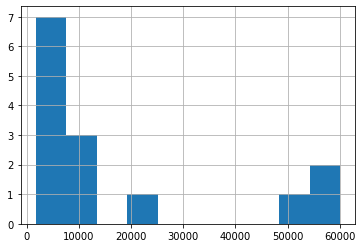

In [14]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

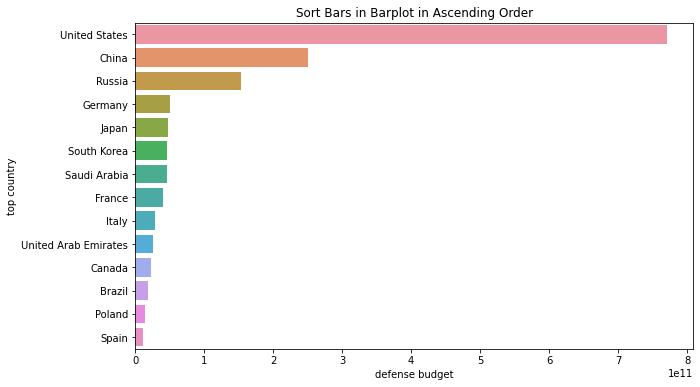

In [15]:
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='defense_budget',
            y="country", 
            data=train.sort_values('defense_budget', ascending=False))
# set labels
plt.xlabel("defense budget")
plt.ylabel("top country")
plt.title("Sort Bars in Barplot in Ascending Order")
plt.show()

<AxesSubplot:xlabel='defense_budget', ylabel='country'>

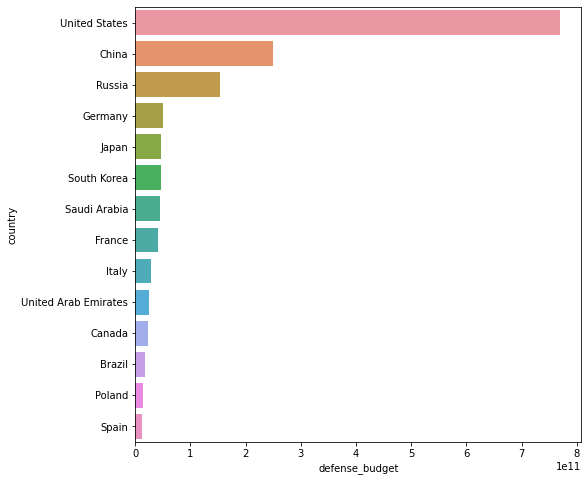

In [16]:
plt.figure(figsize = (8,8))
sns.barplot(y='country', x='defense_budget',data=train.sort_values('defense_budget', ascending=False))

Text(0.5, 1.0, '"Is there a difference in defense_budget by country?"')

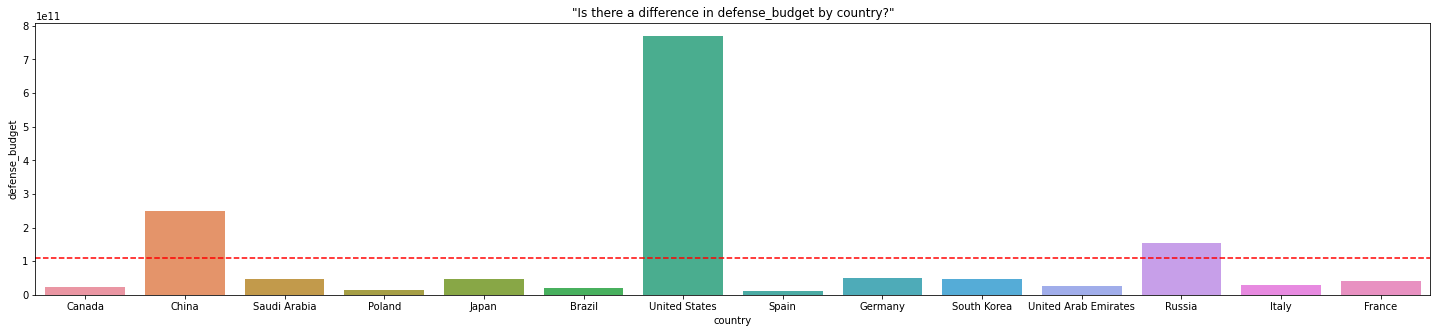

In [17]:
p = plt.figure(figsize=(25,5))
p = sns.barplot(train.country, train.defense_budget)
lmean = train.defense_budget.mean()
p = plt.axhline(lmean, ls='--', color='red')
plt.title('"Is there a difference in defense_budget by country?"')

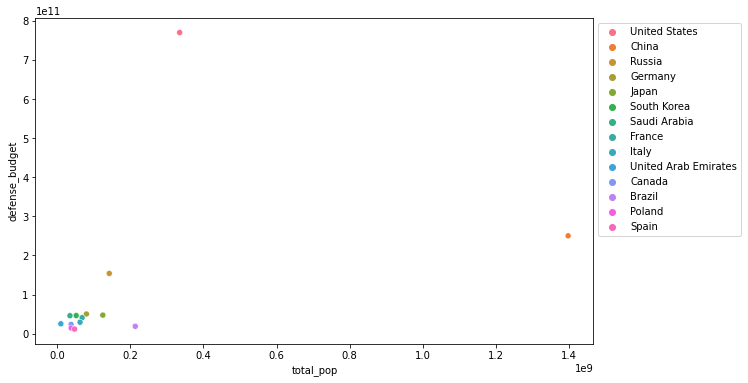

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='total_pop', y='defense_budget', hue='country',data=train.sort_values('defense_budget', 
                                                                                     ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

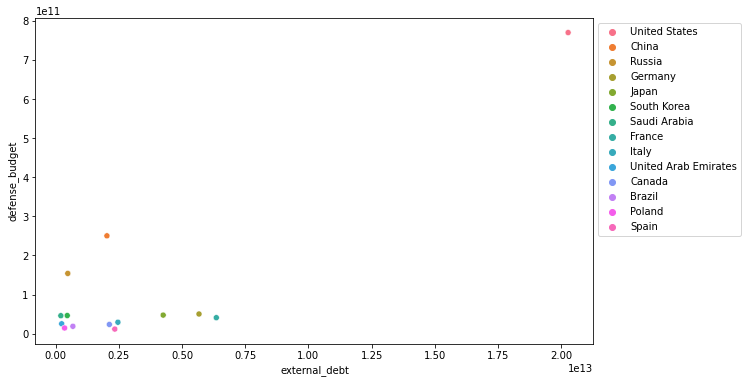

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='external_debt', y='defense_budget', hue='country',data=train.sort_values('defense_budget', 
                                                                                            ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

<AxesSubplot:>

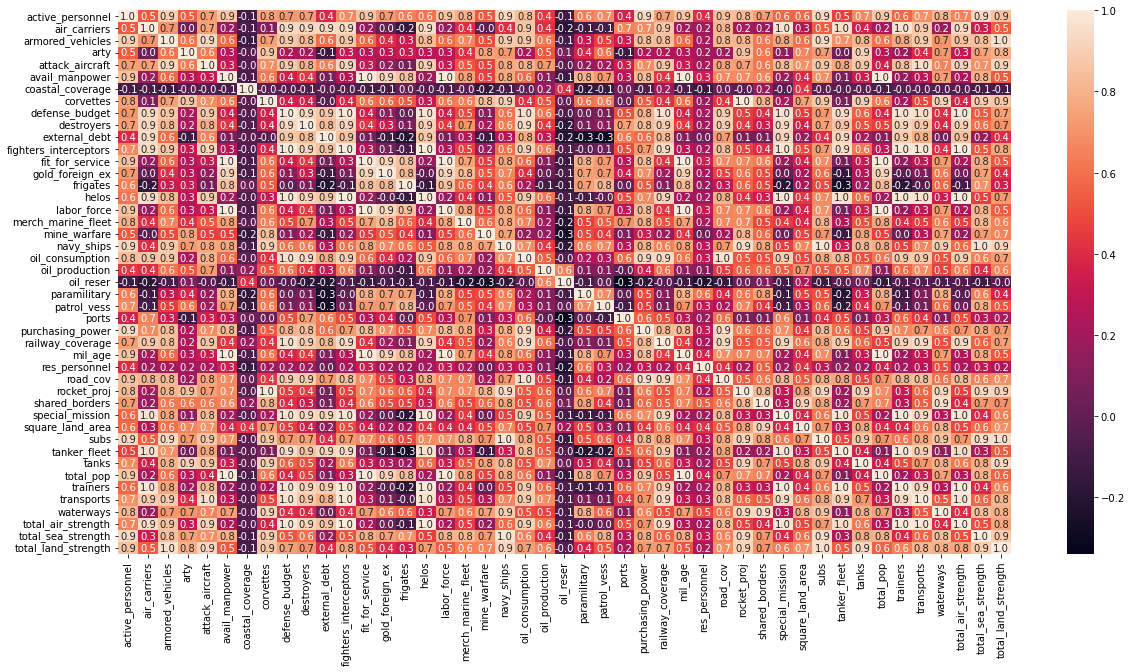

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True, fmt="1.1f")

In [21]:
df1=train.rank(ascending=False,method='min')
df1['country']=train['country']
df1['country_code']=train['country_code']

In [22]:
df1.head(25)

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,coastal_coverage,corvettes,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,waterways,total_air_strength,total_sea_strength,total_land_strength
22,Canada,CAN,13.0,10.0,14.0,12.0,14.0,13.0,1.0,11.0,...,10.0,7.0,14.0,12.0,12.0,14.0,12.0,14.0,14.0,14.0
26,China,CHN,1.0,4.0,2.0,3.0,3.0,1.0,5.0,2.0,...,1.0,9.0,3.0,1.0,4.0,3.0,1.0,3.0,1.0,3.0
104,Saudi Arabia,SAR,7.0,10.0,9.0,5.0,8.0,12.0,10.0,8.0,...,13.0,2.0,5.0,13.0,7.0,7.0,13.0,8.0,8.0,5.0
98,Poland,POL,11.0,10.0,12.0,8.0,13.0,11.0,14.0,9.0,...,12.0,12.0,7.0,11.0,13.0,7.0,7.0,13.0,13.0,11.0
58,Japan,JPN,6.0,2.0,10.0,6.0,6.0,5.0,3.0,6.0,...,5.0,6.0,6.0,5.0,3.0,6.0,9.0,5.0,5.0,8.0
17,Brazil,BRA,5.0,7.0,13.0,7.0,9.0,3.0,7.0,9.0,...,8.0,11.0,8.0,3.0,6.0,4.0,3.0,9.0,10.0,13.0
132,United States,USA,2.0,1.0,1.0,4.0,1.0,2.0,4.0,3.0,...,3.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,3.0,2.0
114,Spain,SPA,11.0,7.0,11.0,10.0,12.0,10.0,8.0,11.0,...,11.0,12.0,11.0,10.0,9.0,7.0,11.0,12.0,11.0,12.0
44,Germany,GER,9.0,10.0,6.0,14.0,7.0,6.0,12.0,7.0,...,9.0,12.0,12.0,6.0,14.0,10.0,6.0,10.0,12.0,7.0
112,South Korea,SKO,4.0,5.0,4.0,2.0,4.0,9.0,11.0,4.0,...,4.0,8.0,4.0,9.0,5.0,11.0,10.0,4.0,4.0,4.0


In [23]:
df2=df1.sort_values('defense_budget', ascending=True).head(25)
df2=df2.set_index('country')
df2=df2.T
df2=df2.drop('country_code', axis=0)
df2

country,United States,China,Russia,Germany,Japan,South Korea,Saudi Arabia,France,Italy,United Arab Emirates,Canada,Brazil,Poland,Spain
active_personnel,2.0,1.0,3.0,9.0,6.0,4.0,7.0,8.0,10.0,14.0,13.0,5.0,11.0,11.0
air_carriers,1.0,4.0,7.0,10.0,2.0,5.0,10.0,2.0,5.0,10.0,10.0,7.0,10.0,7.0
armored_vehicles,1.0,2.0,3.0,6.0,10.0,4.0,9.0,8.0,7.0,5.0,14.0,13.0,12.0,11.0
arty,4.0,3.0,1.0,14.0,6.0,2.0,5.0,11.0,13.0,9.0,12.0,7.0,8.0,10.0
attack_aircraft,1.0,3.0,2.0,7.0,6.0,4.0,8.0,10.0,5.0,11.0,14.0,9.0,13.0,12.0
avail_manpower,2.0,1.0,4.0,6.0,5.0,9.0,12.0,7.0,8.0,14.0,13.0,3.0,11.0,10.0
coastal_coverage,4.0,5.0,2.0,12.0,3.0,11.0,10.0,9.0,6.0,13.0,1.0,7.0,14.0,8.0
corvettes,3.0,2.0,1.0,7.0,6.0,4.0,8.0,11.0,11.0,5.0,11.0,9.0,9.0,11.0
defense_budget,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
destroyers,1.0,2.0,4.0,8.0,3.0,5.0,8.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, 'subs'),
  Text(0.0, 0, 'active_personnel'),
  Text(10.0, 0, 'external_debt'),
  Text(20.0, 0, 'oil_consumption'),
  Text(30.0, 0, 'road_cov'),
  Text(40.0, 0, 'transports'),
  Text(50.0, 0, '')])

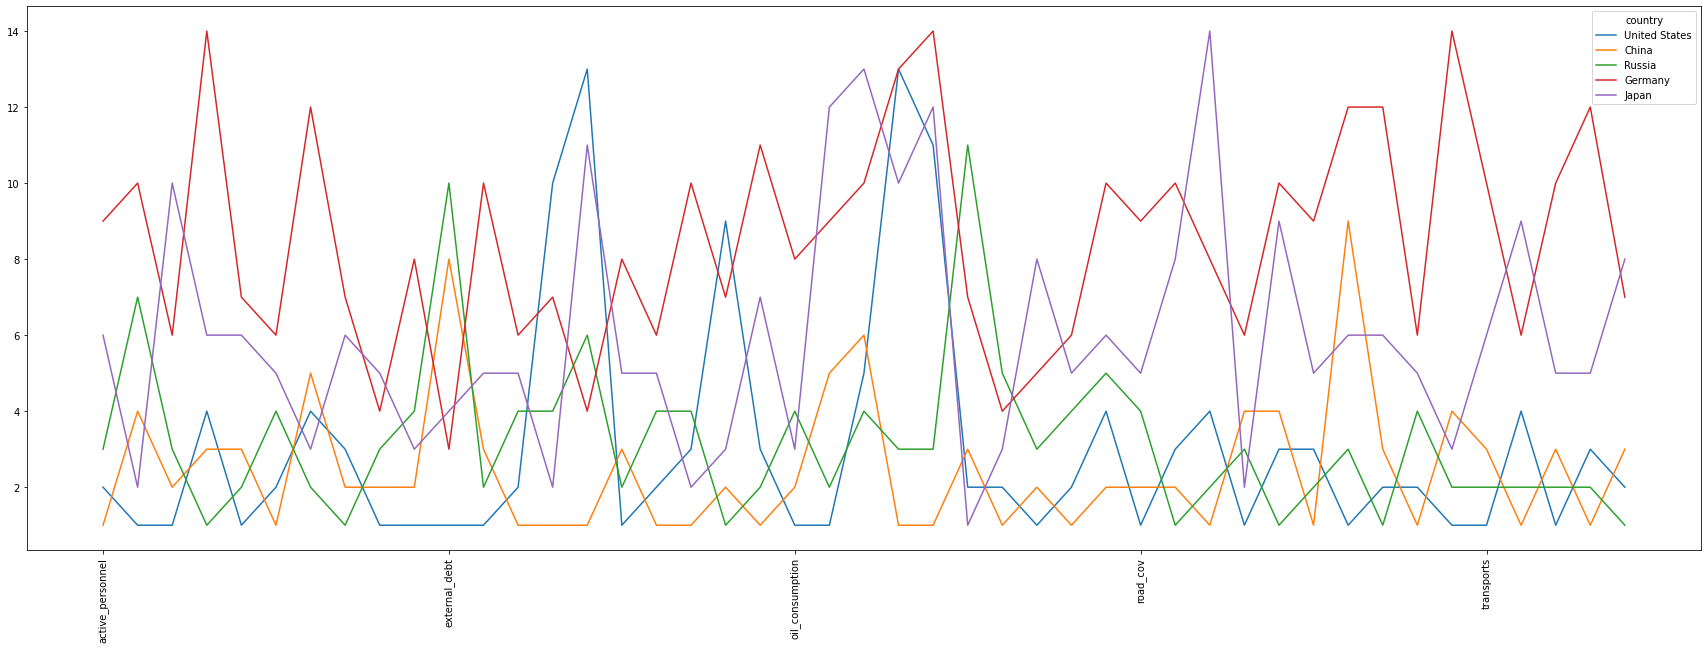

In [24]:
df2.iloc[:,0:5].plot(figsize=(30,10))
plt.xticks(rotation=90)

In [25]:
df_usa=pd.DataFrame(df2[df2['United States']==1.0].index)
df_usa.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,air_carriers,armored_vehicles,attack_aircraft,defense_budget,destroyers,external_debt,fighters_interceptors,helos,oil_consumption,oil_production,railway_coverage,road_cov,special_mission,tanker_fleet,trainers,transports,total_air_strength


In [26]:
np.array(df_usa[0])

array(['air_carriers', 'armored_vehicles', 'attack_aircraft',
       'defense_budget', 'destroyers', 'external_debt',
       'fighters_interceptors', 'helos', 'oil_consumption',
       'oil_production', 'railway_coverage', 'road_cov',
       'special_mission', 'tanker_fleet', 'trainers', 'transports',
       'total_air_strength'], dtype=object)

In [27]:
df_china=pd.DataFrame(df2[df2['China']==1.0].index)
np.array(df_china.T)

array([['active_personnel', 'avail_manpower', 'fit_for_service',
        'gold_foreign_ex', 'frigates', 'labor_force',
        'merch_marine_fleet', 'navy_ships', 'paramilitary',
        'patrol_vess', 'purchasing_power', 'mil_age', 'shared_borders',
        'subs', 'total_pop', 'waterways', 'total_sea_strength']],
      dtype=object)

In [28]:
df_russia=pd.DataFrame(df2[df2['Russia']==1.0].index)
np.array(df_russia.T)

array([['arty', 'corvettes', 'mine_warfare', 'rocket_proj',
        'square_land_area', 'tanks', 'total_land_strength']], dtype=object)

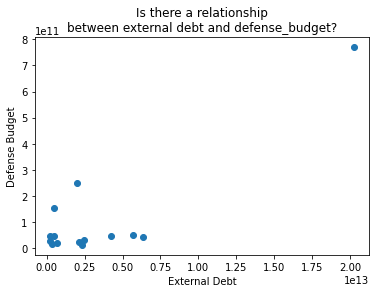

In [29]:
# plot age by logerror
#plt.figure(figsize=(15,6))
plt.scatter(train.external_debt, train.defense_budget)
plt.xlabel("External Debt")
plt.ylabel("Defense Budget")
plt.title("Is there a relationship\nbetween external debt and defense_budget?")
plt.show()

<AxesSubplot:xlabel='defense_budget', ylabel='total_air_strength'>

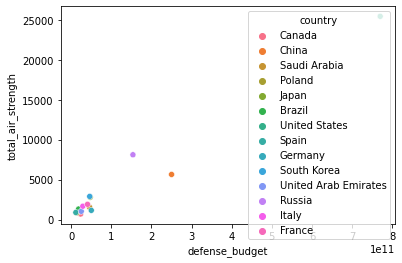

In [30]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength, hue=train.country)

<AxesSubplot:xlabel='defense_budget', ylabel='total_sea_strength'>

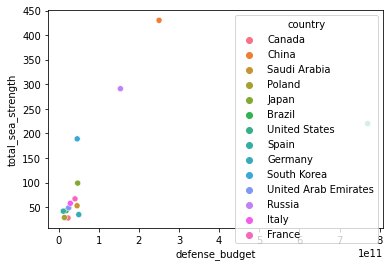

In [31]:
sns.scatterplot(x=train.defense_budget , y=train.total_sea_strength, hue=train.country)

<AxesSubplot:xlabel='defense_budget', ylabel='total_air_strength'>

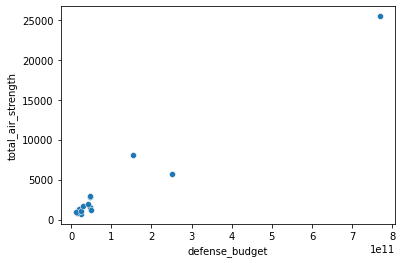

In [32]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength)

<AxesSubplot:xlabel='defense_budget', ylabel='square_land_area'>

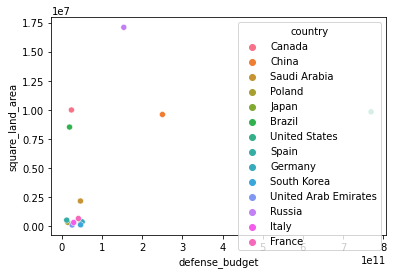

In [33]:
sns.scatterplot(x=train.defense_budget , y=train.square_land_area, hue=train.country)

## Preprocessing

In [34]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [35]:
train_scaled

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,coastal_coverage,corvettes,defense_budget,destroyers,...,subs,tanker_fleet,tanks,total_pop,trainers,transports,waterways,total_air_strength,total_sea_strength,total_land_strength
22,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,3.520314,-0.588751,-0.441740,-0.599111,...,-0.627702,-0.285249,-0.643377,-0.436506,-0.420436,-0.526671,-0.622560,-0.525668,-0.755848,-0.836658
26,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,-0.190798,2.070124,0.727913,1.038458,...,2.095798,-0.304028,0.869890,3.498032,-0.004799,0.462781,2.342513,0.262806,2.671963,1.550341
104,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.425439,-0.436815,-0.325907,-0.599111,...,-0.772955,-0.185099,-0.356418,-0.445647,-0.331371,-0.475220,-0.639804,-0.390701,-0.542676,-0.420284
98,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.468964,-0.512783,-0.488438,-0.599111,...,-0.736642,-0.322806,-0.414689,-0.435804,-0.478250,-0.475220,-0.531437,-0.502431,-0.747321,-0.601602
58,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,0.110930,-0.360847,-0.318257,0.838755,...,-0.010375,-0.278990,-0.373402,-0.185543,0.035827,-0.435642,-0.591815,-0.190957,-0.150439,-0.559276
17,-0.195703,-0.343418,-0.837851,-0.478515,-0.483425,0.071981,-0.329466,-0.512783,-0.466329,-0.599111,...,-0.518762,-0.310287,-0.538842,0.071246,-0.300120,-0.174426,0.715795,-0.425716,-0.627945,-0.767388
132,1.668254,3.462801,2.458622,0.080077,2.711332,0.278238,-0.083489,0.246895,3.409727,3.075434,...,1.696351,3.601832,1.268704,0.422916,3.529676,3.217416,0.472031,3.413519,0.881315,1.889352
114,-0.630023,-0.343418,-0.603396,-0.594122,-0.590979,-0.394225,-0.379460,-0.588751,-0.502627,-0.599111,...,-0.700328,-0.322806,-0.571637,-0.409550,-0.365747,-0.475220,-0.612692,-0.495110,-0.636472,-0.644783
44,-0.514204,-0.543746,-0.284385,-0.623930,-0.401763,-0.313869,-0.430404,-0.398831,-0.303720,-0.599111,...,-0.555075,-0.322806,-0.589499,-0.315109,-0.570440,-0.498967,-0.437359,-0.452774,-0.696160,-0.441397
112,0.157182,-0.143091,0.079535,1.131680,-0.258358,-0.372189,-0.429930,-0.170928,-0.324256,-0.119822,...,0.025938,-0.297768,0.100958,-0.396662,-0.176679,-0.506882,-0.596425,-0.175041,0.616982,0.284480


In [37]:
# Standardize data using PCA (principal component analysis)
pca = PCA()
pca.fit(train_scaled)

PCA()

In [38]:
# shows how much variance is explained by each of the 14 individual components
pca.explained_variance_ratio_

array([5.44734254e-01, 2.17535594e-01, 9.49928792e-02, 4.57814674e-02,
       3.26014814e-02, 2.72305652e-02, 1.59994674e-02, 1.36895057e-02,
       3.26255608e-03, 1.75364111e-03, 1.56432705e-03, 6.61356015e-04,
       1.92905115e-04, 9.01676616e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

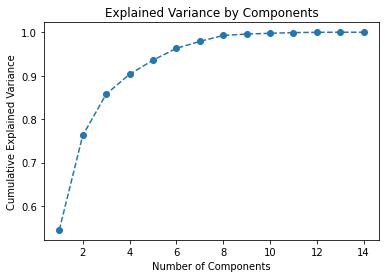

In [39]:
#plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [40]:
# we choose three components which is above 80%
pca = PCA(n_components = 3)

In [41]:
# fit the model to our data with the selected number of compenents = 3
pca.fit(train_scaled)

PCA(n_components=3)

In [42]:
# will only need the caluculated resulting components scores for the lements in our data set.
pca.transform(train_scaled)

array([[-3.0019487 ,  0.5083439 ,  0.69275233],
       [10.55715805, -7.53045167, -2.82952894],
       [-2.76315322,  0.06816332,  1.31253762],
       [-3.54139269,  0.08549051,  0.12510248],
       [-0.94806429,  0.77664318, -2.06780559],
       [-1.24374911, -1.08340562, -0.58763236],
       [11.14103626,  8.54310053, -0.82055203],
       [-3.31563212,  0.17048213, -0.63927365],
       [-2.79480883,  0.37502879, -0.72037182],
       [-1.07284213, -0.9552149 ,  0.33294507],
       [-3.56039522,  0.37716208,  0.31639249],
       [ 5.54169408, -1.95998648,  6.47453337],
       [-2.76421541,  0.15933523, -0.74084667],
       [-2.23368666,  0.465309  , -0.84825229]])

In [43]:
scores_pca = pca.transform(train_scaled)

In [44]:
# within cluster sum of squares wcss. Fit KMeans using the transformed data from the PCA
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

# Now plot the WCSS against the number of components on a graph.

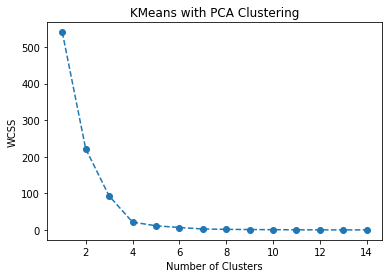

In [45]:
#plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("KMeans with PCA Clustering")
plt.show()

### From the graph we determin the number of clusters to keep using elbow method = 4 clusters

## Modeling

In [46]:
# four clusters chosen, so we run Kmeans with the number of clusters equal to four
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [47]:
# fit data with the kmeans pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [48]:
df_pca_kmeans = pd.concat([train_scaled.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Comp1','Comp2','Comp3']
df_pca_kmeans['KMeans PCA'] = kmeans_pca.labels_

In [49]:
train_scaled = df_pca_kmeans
df_pca_kmeans

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,coastal_coverage,corvettes,defense_budget,destroyers,...,trainers,transports,waterways,total_air_strength,total_sea_strength,total_land_strength,Comp1,Comp2,Comp3,KMeans PCA
0,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,3.520314,-0.588751,-0.441740,-0.599111,...,-0.420436,-0.526671,-0.622560,-0.525668,-0.755848,-0.836658,-3.001949,0.508344,0.692752,1
1,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,-0.190798,2.070124,0.727913,1.038458,...,-0.004799,0.462781,2.342513,0.262806,2.671963,1.550341,10.557158,-7.530452,-2.829529,2
2,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.425439,-0.436815,-0.325907,-0.599111,...,-0.331371,-0.475220,-0.639804,-0.390701,-0.542676,-0.420284,-2.763153,0.068163,1.312538,1
3,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.468964,-0.512783,-0.488438,-0.599111,...,-0.478250,-0.475220,-0.531437,-0.502431,-0.747321,-0.601602,-3.541393,0.085491,0.125102,1
4,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,0.110930,-0.360847,-0.318257,0.838755,...,0.035827,-0.435642,-0.591815,-0.190957,-0.150439,-0.559276,-0.948064,0.776643,-2.067806,1
5,-0.195703,-0.343418,-0.837851,-0.478515,-0.483425,0.071981,-0.329466,-0.512783,-0.466329,-0.599111,...,-0.300120,-0.174426,0.715795,-0.425716,-0.627945,-0.767388,-1.243749,-1.083406,-0.587632,1
6,1.668254,3.462801,2.458622,0.080077,2.711332,0.278238,-0.083489,0.246895,3.409727,3.075434,...,3.529676,3.217416,0.472031,3.413519,0.881315,1.889352,11.141036,8.543101,-0.820552,0
7,-0.630023,-0.343418,-0.603396,-0.594122,-0.590979,-0.394225,-0.379460,-0.588751,-0.502627,-0.599111,...,-0.365747,-0.475220,-0.612692,-0.495110,-0.636472,-0.644783,-3.315632,0.170482,-0.639274,1
8,-0.514204,-0.543746,-0.284385,-0.623930,-0.401763,-0.313869,-0.430404,-0.398831,-0.303720,-0.599111,...,-0.570440,-0.498967,-0.437359,-0.452774,-0.696160,-0.441397,-2.794809,0.375029,-0.720372,1
9,0.157182,-0.143091,0.079535,1.131680,-0.258358,-0.372189,-0.429930,-0.170928,-0.324256,-0.119822,...,-0.176679,-0.506882,-0.596425,-0.175041,0.616982,0.284480,-1.072842,-0.955215,0.332945,1


In [50]:
df_pca_kmeans['Clusters'] = df_pca_kmeans['KMeans PCA'].map({0:'1',
                                                                   1:'2',
                                                                   2:'3',
                                                                   3:'4'})

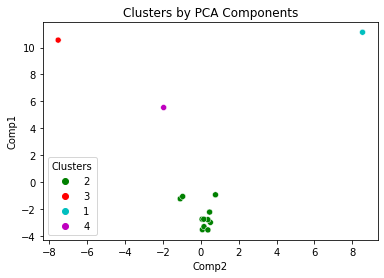

In [51]:
x_axis = df_pca_kmeans['Comp2']
y_axis = df_pca_kmeans['Comp1']
#plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Clusters'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

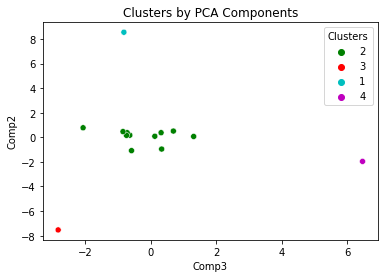

In [52]:
x_axis = df_pca_kmeans['Comp3']
y_axis = df_pca_kmeans['Comp2']
#plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Clusters'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

# Clustering for Features

In [53]:
# list of variables I will cluster on.
X = train_scaled[['defense_budget','external_debt']]

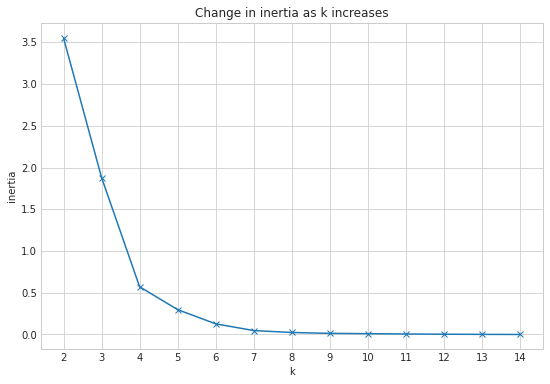

In [54]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [55]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 3, 2, 2, 0, 2, 1, 2, 0, 2, 2, 3, 2, 0], dtype=int32)

In [56]:
train_scaled['cluster1'] = kmeans.predict(X)

<AxesSubplot:xlabel='defense_budget', ylabel='external_debt'>

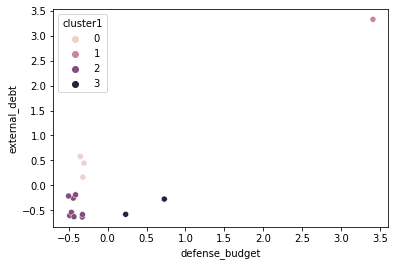

In [57]:
sns.scatterplot(x=train_scaled.defense_budget,y=train_scaled.external_debt, hue=train_scaled.cluster1)

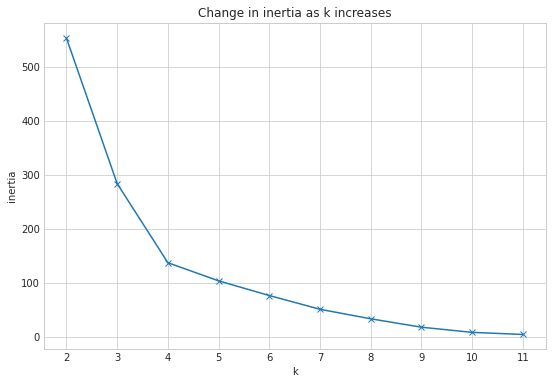

In [58]:
# Let's visualize an elbow method to see if inertia values support our visual hunch that there are 5 clear groups
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k, random_state=42).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [59]:
# Let's move forward with k=5
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(train_scaled)

# And assign the cluster number to a column on the dataframe
train_scaled["cluster"] = kmeans.predict(train_scaled)
train_scaled.head()

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,coastal_coverage,corvettes,defense_budget,destroyers,...,total_air_strength,total_sea_strength,total_land_strength,Comp1,Comp2,Comp3,KMeans PCA,Clusters,cluster1,cluster
0,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,3.520314,-0.588751,-0.441740,-0.599111,...,-0.525668,-0.755848,-0.836658,-3.001949,0.508344,0.692752,1,2,2,1
1,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,-0.190798,2.070124,0.727913,1.038458,...,0.262806,2.671963,1.550341,10.557158,-7.530452,-2.829529,2,3,3,2
2,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.425439,-0.436815,-0.325907,-0.599111,...,-0.390701,-0.542676,-0.420284,-2.763153,0.068163,1.312538,1,2,2,1
3,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.468964,-0.512783,-0.488438,-0.599111,...,-0.502431,-0.747321,-0.601602,-3.541393,0.085491,0.125102,1,2,2,1
4,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,0.110930,-0.360847,-0.318257,0.838755,...,-0.190957,-0.150439,-0.559276,-0.948064,0.776643,-2.067806,1,2,0,1


In [60]:
train_scaled.Clusters.value_counts()

2    11
3     1
1     1
4     1
Name: Clusters, dtype: int64

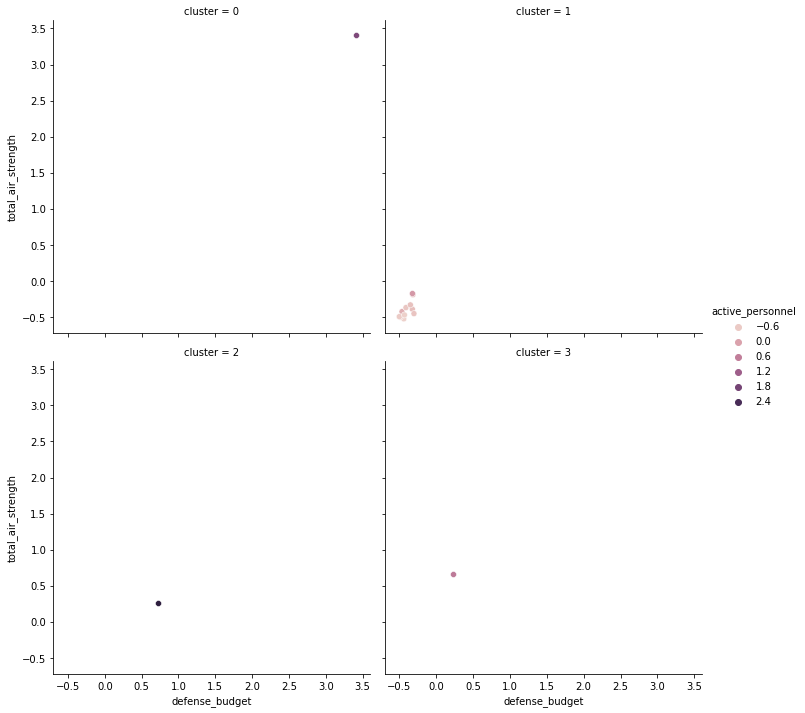

In [61]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=train_scaled, x="defense_budget", y="total_air_strength", col="cluster", hue="active_personnel", col_wrap=2)